In [2]:
# Machine Learning ¬ Diabetes Classification Using Decision Tree Classification Machine Learning Technique

In [3]:
# Importing the necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
# Importing the data sets
data = pd.read_csv('../Supervised DataSets/diabetes_dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Let's Prepare and feature our data for training to the Model
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Standarizing the data
X = data.iloc[:, :-1]
y = data['Outcome']
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [8]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [9]:
# Splitting the data into train and test parts
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
# After selecting the appropriate features and standarizing now, Using the Decision Tree Classificaion technique
tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [11]:
# Checking the accuracy of the model
y_pred = tree.predict(xtest)
classification_report(ytest, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.77      0.80        99\n           1       0.63      0.71      0.67        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n'

<Axes: >

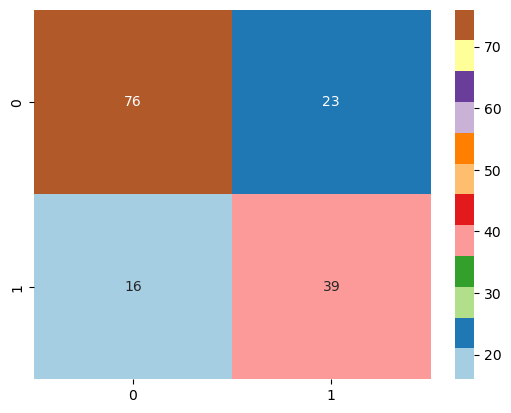

In [12]:
# visualizing using Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Paired')

In [13]:
# Let's use this model to predict if someone has diabeties or not
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction
data.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
240,1,91,64,24,0,29.2,0.192,21,0


In [14]:
pregnancies = float(input("Are you pregnant?:"))
glucose = float(input("What's your glucose level: "))
bloodp = float(input("Your current Blood Pressure: "))
insulin = float(input("Insulin: "))
BMI = float(input("BMI: "))
dpfunction = float(input("Your DiabetesPedigreeFunction: "))

Are you pregnant?: 8
What's your glucose level:  190
Your current Blood Pressure:  69
Insulin:  30
BMI:  35
Your DiabetesPedigreeFunction:  0.897


In [15]:
# Standarizing the input from the user
user = [[pregnancies, glucose, bloodp, 28, insulin, BMI, dpfunction, 69]]

In [16]:
user = scale.fit_transform(user)

In [17]:
prediction = tree.predict(user)

In [18]:
if prediction == 1:
    print("The Patient with this report have Diabetes")
else:
    print("Nothing to Worry!")

Nothing to Worry!


In [36]:
# By Shariph Thapa Magar